**example molecule for explaining morgan fp**

In [1]:
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem import Draw
from scipy.spatial import distance
from rdkit.Chem import AllChem

https://www.youtube.com/watch?v=3qzZbaUzo9M

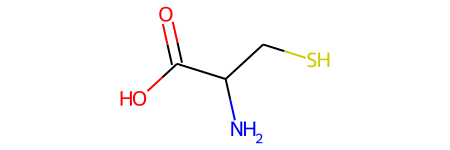

In [2]:
cystein = Chem.MolFromSmiles('C(C(C(=O)O)N)S')
GetMorganFingerprintAsBitVect(cystein, 3, nBits=4096)
cystein

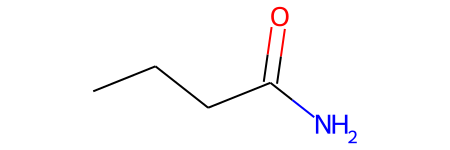

In [3]:
butyramide = Chem.MolFromSmiles('CCCC(=O)N')
butyramide

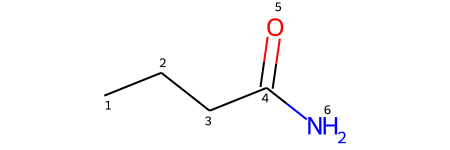

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol

# mol = Chem.MolFromSmiles('c1ccccc(C(N)=O)1')
show_atom_number(butyramide, 'atomNote')

In [5]:
tmp= {}
fp = AllChem.GetMorganFingerprint(butyramide,radius=0, bitInfo=tmp)

In [6]:
fp.GetNonzeroElements()

{847957139: 1, 864942730: 1, 2245384272: 2, 2246699815: 1, 2246728737: 1}

In [7]:
tmp

{847957139: ((5, 0),),
 864942730: ((4, 0),),
 2245384272: ((1, 0), (2, 0)),
 2246699815: ((3, 0),),
 2246728737: ((0, 0),)}

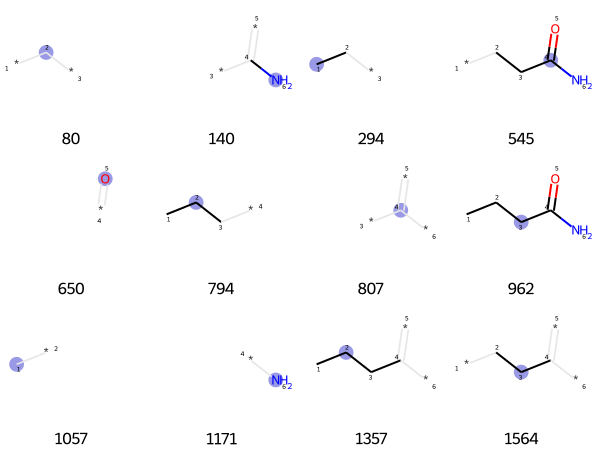

In [8]:
bi = {}
fp = GetMorganFingerprintAsBitVect(butyramide, radius=3, bitInfo=bi)
# show 10 of the set bits:
list(fp.GetOnBits())[:10]
# Draw.DrawMorganBit(cystein,650,bi)
#can i change colorscheme?
tpls = [(butyramide,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:12],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:12])

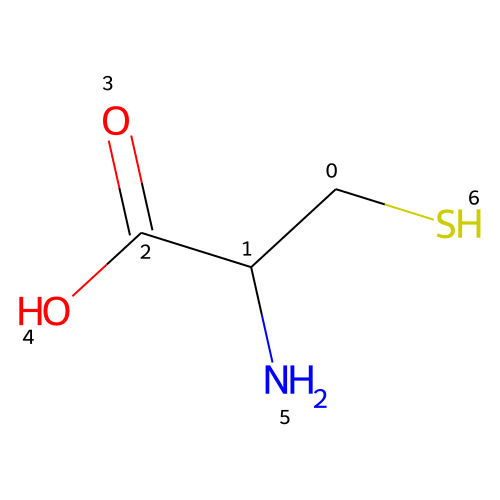

In [9]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500
cystein